# Reading file Temperature.csv

In [4]:
import pandas as pd

df = pd.read_csv('sample_data/temperatures.csv')
df

Produkt_Code  SDO_ID  ...  Qualitaet_Niveau  Qualitaet_Byte
0      TT_TU_MN009    2014  ...                 7               6
1      TT_TU_MN009    2014  ...                 7               6
2      TT_TU_MN009    2014  ...                 7               1
3      TT_TU_MN009    2014  ...                 7               1
4      TT_TU_MN009    2014  ...                 7               1
...            ...     ...  ...               ...             ...
45163  TT_TU_MN009    2014  ...                 0               1
45164  TT_TU_MN009    2014  ...                 0               1
45165  TT_TU_MN009    2014  ...                 0               1
45166  TT_TU_MN009    2014  ...                 0               1
45167  TT_TU_MN009    2014  ...                 0               1

[45168 rows x 6 columns]

# Converting Timestamps of temperature data to 15-minutes interval using interpolation



In [5]:
import pandas as pd

dfI = pd.read_csv('sample_data/temperatures.csv', parse_dates=['Zeitstempel'])
dfI  = dfI.set_index('Zeitstempel').resample(rule='15T').mean().interpolate('linear')
dfI


SDO_ID   Wert  Qualitaet_Niveau  Qualitaet_Byte
Zeitstempel                                                         
2015-01-01 00:00:00  2014.0  3.400               7.0             6.0
2015-01-01 00:15:00  2014.0  3.325               7.0             6.0
2015-01-01 00:30:00  2014.0  3.250               7.0             6.0
2015-01-01 00:45:00  2014.0  3.175               7.0             6.0
2015-01-01 01:00:00  2014.0  3.100               7.0             6.0
...                     ...    ...               ...             ...
2020-02-25 22:00:00  2014.0  3.800               0.0             1.0
2020-02-25 22:15:00  2014.0  3.750               0.0             1.0
2020-02-25 22:30:00  2014.0  3.700               0.0             1.0
2020-02-25 22:45:00  2014.0  3.650               0.0             1.0
2020-02-25 23:00:00  2014.0  3.600               0.0             1.0

[180669 rows x 4 columns]

For interpolation Linear method is used.

# Finding the hottest and coldest temperature values for every year and their time of occurrence.

In [19]:
import pandas as pd
import datetime as dt


dfI = pd.read_csv('sample_data/temperatures.csv', parse_dates=['Zeitstempel'])
nDF  = dfI.set_index('Zeitstempel').resample(rule='15T').mean().interpolate('linear')
  
hotestDays = pd.DataFrame(columns=['Jahr', 'Zeit', 'Wert'])
coldestDays = pd.DataFrame(columns=['Jahr', 'Zeit', 'Wert'])


for lr in range(2015,2021):
  row = nDF.loc[dt.date(year=lr, month=1, day=1):dt.date(year=lr, month=12, day=31)]
  year = int(str(row.Wert.idxmax().year))
  time = str(row.Wert.idxmax().time())
  temp = row.Wert.max()
  hotestDays.loc[str(year)] = [year, time, temp]


for jahr2 in range(2015,2021):
  row = nDF.loc[dt.date(year=jahr2, month=1, day=1):dt.date(year=jahr2, month=12, day=31)]
  year = int(row.Wert.idxmin().year)
  time = str(row.Wert.idxmin().time())
  temp = row.Wert.min()
  coldestDays.loc[year] = [year, time, temp]


In [57]:
hotestDays

Jahr      Zeit  Wert
2015  2015  14:00:00  36.0
2016  2016  14:00:00  34.0
2017  2017  11:00:00  31.9
2018  2018  15:00:00  35.6
2019  2019  13:00:00  37.4
2020  2020  19:00:00  17.7

In [21]:
coldestDays

Jahr      Zeit  Wert
2015  2015  04:00:00  -6.6
2016  2016  02:00:00 -12.0
2017  2017  05:00:00 -10.5
2018  2018  06:00:00 -11.8
2019  2019  06:00:00  -9.0
2020  2020  08:00:00  -4.6

In [22]:
hotestDays.to_csv (r'./sample_data/HottestDays.csv', index = False, header=True)
coldestDays.to_csv (r'./sample_data/ColdestDays.csv', index = False, header=True)


Data for hottest and coldest days of each year is saved in csv format.

#	Ploting the temperatures for the hottest day of each provided year onto the same axis, over time of day

No handles with labels found to put in legend.


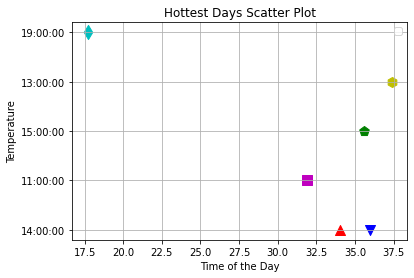

In [55]:
import pandas as pd

hottestDays = pd.read_csv('sample_data/HottestDays.csv')
import matplotlib.pyplot as plt

p_color = {
  "2015": "b",
  "2016": "r",
  "2017": "m",
  "2018": "g",
  "2019": "y",
  "2020": "c",
}
p_marker = {
  "2015": "v",
  "2016": "^",
  "2017": "s",
  "2018": "p",
  "2019": "h",
  "2020": "d",
}

for index, row in hottestDays.iterrows():
  iyear = str(row['Jahr'])
  plt.scatter([row['Wert']], [row['Zeit']], marker=p_marker[iyear], color=p_color[iyear], s=100)

plt.xlabel("Time of the Day")
plt.ylabel("Temperature")
plt.title('Hottest Days Scatter Plot')
plt.legend()
plt.grid(True)

plt.show()


Hottest day in each year is plotted in scatterplot. Legends shows which color and shape of the marker is mapped to which color. Legends in the plot is missing. 
Scatterplot is used beacuse of data to be plotted is multi variate

# Ploting the temperatures for the Coldest day of each provided year onto the same axis, over time of day

No handles with labels found to put in legend.


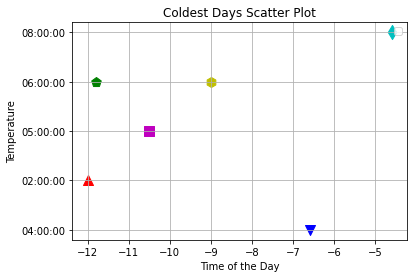

In [35]:
import pandas as pd

coldestDays = pd.read_csv('sample_data/ColdestDays.csv')
import matplotlib.pyplot as plt

p_color = {
  "2015": "b",
  "2016": "r",
  "2017": "m",
  "2018": "g",
  "2019": "y",
  "2020": "c",
}
p_marker = {
  "2015": "v",
  "2016": "^",
  "2017": "s",
  "2018": "p",
  "2019": "h",
  "2020": "d",
}

for index, row in coldestDays.iterrows():
  iyear = str(row['Jahr'])
  plt.scatter([row['Wert']], [row['Zeit']], marker=p_marker[iyear], color=p_color[iyear], s=100)

plt.xlabel("Time of the Day")
plt.ylabel("Temperature")
plt.title('Coldest Days Scatter Plot')
plt.legend()
plt.grid(True)

plt.show()

Coldest day in each year is plotted in scatterplot. Legends shows which color and shape of the marker is mapped to which color. Legends in the plot is missing. Scatterplot is used beacuse of data to be plotted is multi variate

# Other interesting analysis on the same data

One of the interesting analysis can be look for monthly Average Temperatures, which will tell about the hottest and the coldest months in the year/ whole data

In [58]:
import pandas as pd
import datetime as dt

monthlyAverage = pd.DataFrame(columns=['Month', 'year', 'AverageTemperature'])
df = pd.read_csv('sample_data/temperatures.csv', parse_dates=['Zeitstempel'])
dfI  = df.set_index('Zeitstempel').resample(rule='15T').mean().interpolate('linear')
dfI['Zeitstempel'] = dfI.index
dfI.drop(columns=['Qualitaet_Niveau', 'Qualitaet_Byte', 'SDO_ID'])

for fyear in range(2015,2020):
  for fmonth in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    i_month = str(fyear)+'-'+str(fmonth)
    avg_temp = dfI[dfI['Zeitstempel'].dt.strftime('%Y-%m') == i_month].mean().Wert
    monthlyAverage.loc[i_month] = [fmonth, fyear, avg_temp]


monthlyAverage

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  del sys.path[0]


Month  year  AverageTemperature
2015-01    01  2015            3.298656
2015-02    02  2015            2.333464
2015-03    03  2015            5.757644
2015-04    04  2015            8.640382
2015-05    05  2015           12.142154
2015-06    06  2015           15.742743
2015-07    07  2015           18.857292
2015-08    08  2015           19.808653
2015-09    09  2015           13.376806
2015-10    10  2015            8.832846
2015-11    11  2015            8.900903
2015-12    12  2015            8.852755
2016-01    01  2016            1.664819
2016-02    02  2016            3.798833
2016-03    03  2016            4.889533
2016-04    04  2016            8.508316
2016-05    05  2016           14.620413
2016-06    06  2016           17.703976
2016-07    07  2016           19.058367
2016-08    08  2016           18.037769
2016-09    09  2016           17.691337
2016-10    10  2016            9.104906
2016-11    11  2016            4.486406
2016-12    12  2016            4.059745
2017-01    01  2017            0.056872
2017-02    02  2017            3.496708
2017-03    03  2017            7.987366
2017-04    04  2017            7.750330
2017-05    05  2017           14.759677
2017-06    06  2017           17.755590
2017-07    07  2017           17.990323
2017-08    08  2017           17.649933
2017-09    09  2017           13.632899
2017-10    10  2017           12.432510
2017-11    11  2017            6.427309
2017-12    12  2017            4.274076
2018-01    01  2018            4.286089
2018-02    02  2018           -0.989676
2018-03    03  2018            2.835937
2018-04    04  2018           12.591493
2018-05    05  2018           16.865575
2018-06    06  2018           18.053247
2018-07    07  2018           20.681183
2018-08    08  2018           19.965457
2018-09    09  2018           15.575816
2018-10    10  2018           11.456838
2018-11    11  2018            6.017396
2018-12    12  2018            5.398101
2019-01    01  2019            1.925504
2019-02    02  2019            5.586998
2019-03    03  2019            7.290407
2019-04    04  2019            9.938750
2019-05    05  2019           11.526831
2019-06    06  2019           20.249618
2019-07    07  2019           19.020968
2019-08    08  2019           19.822110
2019-09    09  2019           14.392187
2019-10    10  2019           11.674815
2019-11    11  2019            5.975521
2019-12    12  2019            5.046489



---




Another anaylsis could be to plot the data in multi line chart. Each line representing different year. by which overall temperature trend, throughout the year, can be seen. 

In [52]:
import matplotlib.pyplot as plt
import numpy as np
 

x = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthlyAverage.index = monthlyAverage.index.astype('str')

for row in [2015, 2016, 2017, 2018, 2019]:
  iyear = str(row)
  df = monthlyAverage[monthlyAverage.index.str.contains(str(row))]
  y = df['AverageTemperature'].values.tolist()
  print(y)
  plt.plot(x, y, label="Year: "+ iyear)

plt.plot(figsize=(8, 6), dpi=80)
plt.xlabel("Months of Year")
plt.ylabel("Average Monthly Temperature")
plt.title("Line Graph Example")
plt.legend()
plt.show()


[3.2986559139784957, 2.3334635416666707, 5.757644489247307, 8.64038194444443, 12.142153897849461, 15.74274305555558, 18.857291666666665, 19.808652553763423, 13.376805555555544, 8.832846102150539, 8.900902777777812, 8.852755376344065]
[1.6648185483870968, 3.798832614942536, 4.889532930107522, 8.508315972222228, 14.6204133064516, 17.703975694444438, 19.0583669354839, 18.037768817204313, 17.69133680555553, 9.104905913978508, 4.486406249999995, 4.059744623655907]
[0.05687163978494551, 3.4967075892857196, 7.987365591397851, 7.750329861111122, 14.759677419354851, 17.755590277777767, 17.990322580645145, 17.64993279569888, 13.632899305555544, 12.432510080645185, 6.427309027777796, 4.274075940860214]
[4.28608870967742, -0.9896763392857143, 2.8359374999999996, 12.591493055555548, 16.865574596774177, 18.053246527777773, 20.68118279569891, 19.965456989247304, 15.575815972222232, 11.45683803763439, 6.0173958333333415, 5.398101478494631]
[1.9255040322580679, 5.586997767857143, 7.290406586021517, 9.9



---



Time series plot drwan for individual years of data.

In [54]:
plot_objects = plt.subplots(nrows=5, ncols=1, figsize=(16, 15))

fig, ((ax1), (ax2), (ax3), (ax4), (ax5)) = plot_objects

plot_objects

ax1.plot(dfI.loc['2015-01-01':'2015-12-31'].Wert, c='blue', linewidth=1.0 )
ax2.plot(dfI.loc['2016-01-01':'2016-12-31'].Wert, c='blue', linewidth=1.0)
ax3.plot(dfI.loc['2017-01-01':'2017-12-31'].Wert, c='blue', linewidth=1.0)
ax4.plot(dfI.loc['2018-01-01':'2018-12-31'].Wert, c='blue', linewidth=1.0)
ax5.plot(dfI.loc['2019-01-01':'2019-12-31'].Wert, c='blue', linewidth=1.0)


